Problem set 3

Use NumPy to simulate yearly revenues for 1,000 new ventures for a ten-year timespan (since the inception of businesses to year '10'). Then, use Matplotlib to create one figure that shows both the within and between variation in revenues.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# set seed
np.random.seed(555)

# periods
p = 11

# sub-population size
s = 1000

# simulation data
b1, b2 = 3 * 1000, - 2 * 100
x = []

for venture in range(s):
    for time in np.arange(1, p, 1):
        rev = (b1 * time + b2 * time ** 2) * np.random.random() 
        x.append([venture, time, rev]) 

In [3]:
df = pd.DataFrame(x, columns = ['venture','time','revenue'])
df 

,venture,time,revenue
0,0,1,2009.935445
1,0,2,248.846689
2,0,3,6800.198239
3,0,4,6040.144349
4,0,5,5812.073342
...,...,...,...
9995,999,6,4870.521668
9996,999,7,6573.403569
9997,999,8,3151.529123
9998,999,9,6472.789400


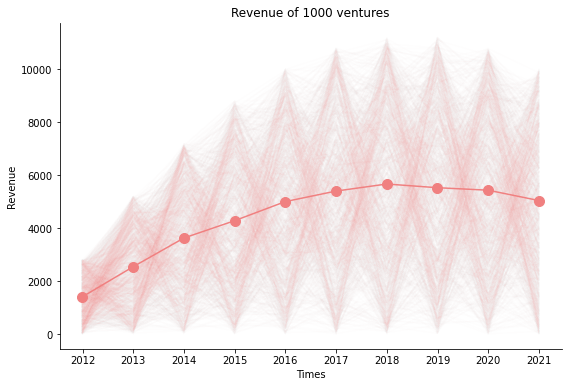

In [5]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
ax = fig.add_subplot(1, 1, 1)

# plot data within
index = pd.date_range(start='2011-12-31', periods=10, freq='Y')

for venture in range(s):
    y_obs = df.loc[(df['venture'] == venture)]['revenue'].values
    ax.plot(index, y_obs, color='lightcoral', alpha=0.01)

#plot data between
c = pd.DataFrame(df.groupby('time', as_index=False)['revenue'].agg(np.mean))
ax.plot(index, c.revenue, marker='o' 
        , markersize=10, color='lightcoral'
        , alpha=1, label='Revenue')

#set_label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Times')
ax.set_ylabel('Revenue')
ax.set_title('Revenue of 1000 ventures')

#show
plt.show()